In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [21]:
file_path = '../Dataset/SurveyData/SurveyData_CSV_DAP_2021_HLES_dog_owner_v1.0.csv'

In [22]:
df = pd.read_csv(file_path)
df

/var/folders/zd/3_6frj8s08b9zb1f3y0xqr2r0000gn/T/ipykernel_45473/186637762.py:1: DtypeWarning: Columns (5,21,75,77,79,81,83,85,87,89,191,192,193,194,195,196,197,198,199,200,201,204,214,285,295,516,566) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,dog_id,owner_id,st_hles_completion_date,dd_breed_pure_or_mixed,dd_breed_pure,dd_breed_pure_non_akc,dd_breed_mixed_primary,dd_breed_mixed_secondary,dd_age_years,dd_age_basis,...,oc_primary_residence_state,oc_primary_residence_census_division,oc_primary_residence_ownership,oc_primary_residence_ownership_other_description,oc_primary_residence_time_percentage,oc_secondary_residence,oc_secondary_residence_state,oc_secondary_residence_ownership,oc_secondary_residence_ownership_other_description,oc_secondary_residence_time_percentage
0,10509,14660,2020-10-17,2,NaN,NaN,16.0,999.0,16.333333,2,...,MO,4.0,2,NaN,NaN,False,NaN,NaN,NaN,NaN
1,74227,16755,2020-10-26,2,NaN,NaN,133.0,12.0,1.833333,1,...,MD,5.0,2,NaN,NaN,False,NaN,NaN,NaN,NaN
2,32487,8568,2020-09-07,1,159.0,NaN,NaN,NaN,13.000000,3,...,VA,5.0,1,NaN,NaN,False,NaN,NaN,NaN,NaN
3,63150,5380,2020-08-21,2,NaN,NaN,999.0,999.0,13.000000,3,...,CA,9.0,2,NaN,NaN,False,NaN,NaN,NaN,NaN
4,33369,15957,2020-10-23,2,NaN,NaN,230.0,82.0,2.166667,1,...,OH,3.0,2,NaN,NaN,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33167,91849,32736,2021-06-22,2,NaN,NaN,276.0,1.0,10.000000,3,...,CA,9.0,2,NaN,5.0,True,NH,2.0,NaN,1.0
33168,33783,9482,2020-09-15,2,NaN,NaN,130.0,195.0,3.000000,3,...,WA,9.0,1,NaN,NaN,False,NaN,NaN,NaN,NaN
33169,98862,32312,2021-05-25,2,NaN,NaN,60.0,49.0,4.000000,3,...,AR,7.0,2,NaN,NaN,False,NaN,NaN,NaN,NaN
33170,99462,32692,2021-06-18,2,NaN,NaN,204.0,27.0,0.916667,1,...,WA,9.0,2,NaN,NaN,False,NaN,NaN,NaN,NaN


In [23]:
df['dd_breed_pure'].value_counts()

dd_breed_pure
153.0    1985
120.0    1728
114.0     759
195.0     547
18.0      543
         ... 
198.0       1
58.0        1
170.0       1
35.0        1
178.0       1
Name: count, Length: 248, dtype: int64

In [24]:
len(df.columns)

658

In [25]:
# Get value counts for each column with a limited amount of possible values
limited_value_counts = {col: df[col].value_counts() for col in df.columns if df[col].nunique() <= 10}
len(limited_value_counts.keys())

522

In [26]:
df["dd_breed_pure"].value_counts().sum()

16619

In [27]:
df["dd_breed_pure"].isna().sum()

16553

In [28]:
df[["dog_id","dd_breed_mixed_primary", "dd_breed_mixed_secondary"]]

,dog_id,dd_breed_mixed_primary,dd_breed_mixed_secondary
0,10509,16.0,999.0
1,74227,133.0,12.0
2,32487,NaN,NaN
3,63150,999.0,999.0
4,33369,230.0,82.0
...,...,...,...
33167,91849,276.0,1.0
33168,33783,130.0,195.0
33169,98862,60.0,49.0
33170,99462,204.0,27.0


In [29]:
# new
pure_breed_mapping = {999: 'Unknown',
 1: 'Affenpinscher',
 2: 'Afghan Hound',
 3: 'Airedale Terrier',
 4: 'Akita',
 5: 'Alaskan Malamute',
 6: 'American English Coonhound',
 7: 'American Eskimo Dog',
 8: 'American Foxhound',
 9: 'American Hairless Terrier',
 10: 'American Leopard Hound',
 11: 'American Pitbull Terrier',
 12: 'American Staffordshire Terrier',
 13: 'American Water Spaniel',
 14: 'Anatolian Shepherd Dog',
 15: 'Appenzeller Sennenhund',
 16: 'Australian Cattle Dog',
 17: 'Australian Kelpie',
 18: 'Australian Shepherd',
 19: 'Australian Stumpy Tail Cattle Dog',
 20: 'Australian Terrier',
 21: 'Azawakh',
 22: 'Barbet',
 23: 'Basenji',
 24: 'Basset Fauve de Bretagne',
 25: 'Basset Hound',
 26: 'Bavarian Mountain Scent Hound',
 27: 'Beagle',
 28: 'Bearded Collie',
 29: 'Beauceron',
 30: 'Bedlington Terrier',
 31: 'Belgian Laekenois',
 32: 'Belgian Malinois',
 33: 'Belgian Sheepdog',
 34: 'Belgian Tervuren',
 35: 'Bergamasco',
 36: 'Berger Picard',
 37: 'Bernese Mountain Dog',
 38: 'Bichon Frise',
 39: 'Biewer Terrier',
 40: 'Black and Tan Coonhound',
 278: 'Black Mouth Cur',
 41: 'Black Russian Terrier',
 42: 'Bloodhound',
 279: 'Blue Lacey',
 43: 'Bluetick Coonhound',
 44: 'Boerboel',
 45: 'Bolognese',
 46: 'Border Collie',
 47: 'Border Terrier',
 48: 'Borzoi',
 49: 'Boston Terrier',
 50: 'Bouvier des Flandres',
 51: 'Boxer',
 52: 'Boykin Spaniel',
 53: 'Bracco Italiano',
 54: 'Braque de Bourbonnais',
 55: 'Braque Francais Pyrenean',
 56: 'Briard',
 57: 'Brittany',
 58: 'Broholmer',
 59: 'Brussels Griffon',
 60: 'Bull Terrier',
 61: 'Bulldog',
 62: 'Bullmastiff',
 63: 'Cairn Terrier',
 64: 'Canaan Dog',
 65: 'Cane Corso',
 66: 'Cardigan Welsh Corgi',
 67: 'Carolina Dog',
 68: 'Catahoula Leopard Dog',
 69: 'Caucasian Shepherd Dog',
 70: 'Cavalier King Charles Spaniel',
 71: 'Central Asian Shepherd Dog',
 72: 'Cesky Terrier',
 73: 'Chesapeake Bay Retriever',
 74: 'Chihuahua',
 75: 'Chinese Crested',
 76: 'Chinese Shar-Pei',
 77: 'Chinook',
 78: 'Chow Chow',
 79: "Cirneco Dell'Etna",
 80: 'Clumber Spaniel',
 81: 'Cocker Spaniel',
 82: 'Collie',
 83: 'Coton De Tulear',
 84: 'Croatian Sheepdog',
 85: 'Curly-Coated Retriever',
 86: 'Czechoslovakian Vlack',
 87: 'Dachshund',
 88: 'Dalmatian',
 89: 'Dandie Dinmont Terrier',
 90: 'Danish-Swedish Farmdog',
 91: 'Deutscher Wachtelhund',
 92: 'Doberman Pinscher',
 93: 'Dogo Argentino',
 94: 'Dogue de Bordeaux',
 95: 'Drentsche Patrijshond',
 96: 'Drever',
 97: 'Dutch Shepherd',
 98: 'English Cocker Spaniel',
 99: 'English Foxhound',
 100: 'English Setter',
 280: 'English Shepherd',
 101: 'English Springer Spaniel',
 102: 'English Toy Spaniel',
 103: 'Entlebucher Mountain Dog',
 104: 'Estrela Mountain Dog',
 105: 'Eurasier',
 106: 'Field Spaniel',
 107: 'Finish Spitz',
 108: 'Finnish Lapphund',
 109: 'Flat-Coated Retriever',
 110: 'French Bulldog',
 111: 'French Spaniel',
 112: 'German Longhaired Pointer',
 113: 'German Pinscher',
 114: 'German Shepherd Dog',
 115: 'German Shorthaired Pointer',
 116: 'German Spitz',
 117: 'German Wirehaired Pointer',
 118: 'Giant Schnauzer',
 119: 'Glen of Imaal Terrier',
 120: 'Golden Retriever',
 121: 'Gordon Setter',
 122: 'Grand Basset Griffon Vendeen',
 123: 'Great Dane',
 124: 'Great Pyrenees',
 125: 'Greater Swiss Mountain Dog',
 126: 'Greyhound',
 127: 'Hamiltonstovare',
 128: 'Hanoverian Scenthound',
 129: 'Harrier',
 130: 'Havanese',
 131: 'Hokkaido',
 132: 'Hovawart',
 133: 'Ibizan Hound',
 134: 'Icelandic Sheepdog',
 135: 'Irish Red and White Setter',
 136: 'Irish Setter',
 137: 'Irish Terrier',
 138: 'Irish Water Spaniel',
 139: 'Irish Wolfhound',
 140: 'Italian Greyhound',
 141: 'Jack Russell Terrier',
 142: 'Jagdterrier',
 143: 'Japanese Chin',
 144: 'Jindo',
 145: 'Kai Ken',
 146: 'Karelian Bear Dog',
 147: 'Keeshond',
 148: 'Kerry Blue Terrier',
 149: 'Kishu Ken',
 150: 'Komondor',
 151: 'Kromfohrlander',
 152: 'Kuvasz',
 153: 'Labrador Retriever',
 154: 'Lagotto Romagnolo',
 155: 'Lakeland Terrier',
 156: 'Lancashire Heeler',
 157: 'Lapponian Herder',
 158: 'Leonberger',
 159: 'Lhasa Apso',
 160: 'Lowchen',
 161: 'Maltese',
 162: 'Manchester Terrier',
 164: 'Mastiff',
 165: 'Miniature American Shepherd',
 166: 'Miniature Bull Terrier',
 167: 'Miniature Pinscher',
 168: 'Miniature Schnauzer',
 169: 'Mountain Cur',
 170: 'Mudi',
 171: 'Neapolitan Mastiff',
 172: 'Nederlandse Kooikerhondje',
 173: 'Newfoundland',
 174: 'Norfolk Terrier',
 175: 'Norrbottenspets',
 176: 'Norwegian Buhund',
 177: 'Norwegian Elkhound',
 178: 'Norwegian Lundhund',
 179: 'Norwich Terrier',
 180: 'Nova Scotia Duck Tolling Retriever',
 181: 'Old English Sheepdog',
 182: 'Otterhound',
 183: 'Papillon',
 184: 'Parson Russell Terrier',
 185: 'Pekingese',
 186: 'Pembroke Welsh Corgi',
 187: 'Perro de Presa Canario',
 188: 'Peruvian Inca Orchid',
 189: 'Petit Basset Griffon Vendeen',
 190: 'Pharaoh Hound',
 191: 'Plott',
 192: 'Pointer',
 193: 'Polish Lowland Sheepdog',
 194: 'Pomeranian',
 195: 'Poodle',
 196: 'Poodle (Toy)',
 197: 'Porcelaine',
 198: 'Portuguese Podengo',
 199: 'Portuguese Podengo Pequeno',
 200: 'Portuguese Pointer',
 201: 'Portuguese Sheepdog',
 202: 'Portuguese Water Dog',
 203: 'Pudelpointer',
 204: 'Pug',
 205: 'Puli',
 206: 'Pumi',
 207: 'Pyrenean Mastiff',
 208: 'Pyrenean Shepherd',
 209: 'Rafeiro de Alentejo',
 210: 'Rat Terrier',
 211: 'Redbone Coonhound',
 212: 'Rhodesian Ridgeback',
 213: 'Romanian Mioritic Shepherd Dog',
 214: 'Rottweiler',
 215: 'Russell Terrier',
 216: 'Russian Toy',
 217: 'Russian Tsvetnaya Bolonka',
 218: 'Saluki',
 219: 'Samoyed',
 220: 'Schapendoes',
 221: 'Schipperke',
 222: 'Scottish Deerhound',
 223: 'Scottish Terrier',
 224: 'Sealyham Terrier',
 225: 'Segugio Italiano',
 226: 'Shetland Sheepdog',
 227: 'Shiba Inu',
 228: 'Shih Tzu',
 229: 'Shikoku',
 230: 'Siberian Husky',
 281: 'Silken Windhound',
 231: 'Silky Terrier',
 232: 'Skye Terrier',
 233: 'Sloughi',
 234: 'Slovakian Wirehaired Pointer',
 235: 'Slovensky Cuvac',
 236: 'Slovensky Kopov',
 237: 'Small Musterlander Pointer',
 238: 'Smooth Fox Terrier',
 239: 'Soft Coated Wheaten Terrier',
 240: 'Spanish Mastiff',
 241: 'Spanish Water Dog',
 242: 'Spinone Italiano',
 243: 'St. Bernard',
 244: 'Stabyhoun',
 245: 'Staffordshire Bull Terrier',
 246: 'Standard Schnauzer',
 247: 'Sussex Spaniel',
 248: 'Swedish Lapphund',
 249: 'Swedish Vallhund',
 250: 'Taiwan Dog',
 251: 'Teddy Roosevelt Terrier',
 252: 'Thai Ridgeback',
 253: 'Tibetan Mastiff',
 254: 'Tibetan Spaniel',
 255: 'Tibetan Terrier',
 256: 'Tornjak',
 257: 'Tosa',
 258: 'Toy Fox Terrier',
 259: 'Transylvanian Hound',
 260: 'Treeing Tennessee Brindle',
 261: 'Treeing Walker Coonhound',
 262: 'Village Dog',
 263: 'Vizsla',
 264: 'Weimaraner',
 265: 'Welsh Springer Spaniel',
 266: 'Welsh Terrier',
 267: 'West Highland White Terrier',
 268: 'Whippet',
 269: 'Wire Fox Terrier',
 270: 'Wirehaired Pointing Griffon',
 271: 'Wirehaired Vizsla',
 272: 'Wolf-hybrid',
 273: 'Working Kelpie',
 274: 'Xoloitzcuintli',
 275: 'Yakutian Laika',
 276: 'Yorkshire Terrier',
 277: 'My dog is a non-AKC purebred not listed here'}

In [30]:
# Map the classification dict in helper.py to the 'Breed' column
df['dd_breed_mixed_primary'] = df['dd_breed_mixed_primary'].map(lambda x: pure_breed_mapping.get(x, x))
df['dd_breed_mixed_secondary'] = df['dd_breed_mixed_secondary'].map(lambda x: pure_breed_mapping.get(x, x))
df['dd_breed_pure'] = df['dd_breed_pure'].map(lambda x: pure_breed_mapping.get(x, x))
df[['dog_id','dd_breed_pure_non_akc', 'dd_breed_pure' ,'dd_breed_mixed_primary', 'dd_breed_mixed_secondary']]

,dog_id,dd_breed_pure_non_akc,dd_breed_pure,dd_breed_mixed_primary,dd_breed_mixed_secondary
0,10509,NaN,NaN,Australian Cattle Dog,Unknown
1,74227,NaN,NaN,Ibizan Hound,American Staffordshire Terrier
2,32487,NaN,Lhasa Apso,NaN,NaN
3,63150,NaN,NaN,Unknown,Unknown
4,33369,NaN,NaN,Siberian Husky,Collie
...,...,...,...,...,...
33167,91849,NaN,NaN,Yorkshire Terrier,Affenpinscher
33168,33783,NaN,NaN,Havanese,Poodle
33169,98862,NaN,NaN,Bull Terrier,Boston Terrier
33170,99462,NaN,NaN,Pug,Beagle


In [31]:
df['dd_breed_pure_non_akc'].value_counts()

dd_breed_pure_non_akc
Alaskan Klee Kai                              5
English Shepherd                              4
Silken Windhound                              4
American Bully                                4
Shiloh Shepherd                               3
Maremma Sheepdog                              3
American Bulldog                              2
Berger Blanc Suisse / White Swiss Shepherd    2
Japanese Spitz                                2
Australian Labradoddle                        2
Australian Labradoodle                        2
Miniature Australian Shepherd                 2
Austrailian Labradoodle                       1
Akbash                                        1
Japanese Akita Inu                            1
PODENCO                                       1
Labradoodle                                   1
labradoodle                                   1
Mini Australian Shepherd                      1
Large Munsterlander                           1
Miki              

In [32]:
df['dd_breed'] = df['dd_breed_pure'].fillna(df['dd_breed_mixed_primary'])
df['dd_breed'].value_counts().sum()

33172

In [33]:
df['dd_breed'] = df['dd_breed_pure'].fillna(df['dd_breed_mixed_primary'])
set(df['dd_breed'])

{'Affenpinscher',
 'Afghan Hound',
 'Airedale Terrier',
 'Akita',
 'Alaskan Malamute',
 'American English Coonhound',
 'American Eskimo Dog',
 'American Foxhound',
 'American Hairless Terrier',
 'American Leopard Hound',
 'American Pitbull Terrier',
 'American Staffordshire Terrier',
 'American Water Spaniel',
 'Anatolian Shepherd Dog',
 'Appenzeller Sennenhund',
 'Australian Cattle Dog',
 'Australian Kelpie',
 'Australian Shepherd',
 'Australian Stumpy Tail Cattle Dog',
 'Australian Terrier',
 'Azawakh',
 'Barbet',
 'Basenji',
 'Basset Fauve de Bretagne',
 'Basset Hound',
 'Bavarian Mountain Scent Hound',
 'Beagle',
 'Bearded Collie',
 'Beauceron',
 'Bedlington Terrier',
 'Belgian Laekenois',
 'Belgian Malinois',
 'Belgian Sheepdog',
 'Belgian Tervuren',
 'Bergamasco',
 'Berger Picard',
 'Bernese Mountain Dog',
 'Bichon Frise',
 'Biewer Terrier',
 'Black Mouth Cur',
 'Black Russian Terrier',
 'Black and Tan Coonhound',
 'Bloodhound',
 'Blue Lacey',
 'Bluetick Coonhound',
 'Boerboel',


In [34]:
df['dd_breed_2'] = df['dd_breed_pure'].fillna(df['dd_breed_mixed_secondary'])
set(df['dd_breed_2'])

{'Affenpinscher',
 'Afghan Hound',
 'Airedale Terrier',
 'Akita',
 'Alaskan Malamute',
 'American English Coonhound',
 'American Eskimo Dog',
 'American Foxhound',
 'American Hairless Terrier',
 'American Leopard Hound',
 'American Pitbull Terrier',
 'American Staffordshire Terrier',
 'American Water Spaniel',
 'Anatolian Shepherd Dog',
 'Appenzeller Sennenhund',
 'Australian Cattle Dog',
 'Australian Kelpie',
 'Australian Shepherd',
 'Australian Stumpy Tail Cattle Dog',
 'Australian Terrier',
 'Azawakh',
 'Barbet',
 'Basenji',
 'Basset Fauve de Bretagne',
 'Basset Hound',
 'Bavarian Mountain Scent Hound',
 'Beagle',
 'Bearded Collie',
 'Beauceron',
 'Bedlington Terrier',
 'Belgian Laekenois',
 'Belgian Malinois',
 'Belgian Sheepdog',
 'Belgian Tervuren',
 'Bergamasco',
 'Berger Picard',
 'Bernese Mountain Dog',
 'Bichon Frise',
 'Biewer Terrier',
 'Black Mouth Cur',
 'Black Russian Terrier',
 'Black and Tan Coonhound',
 'Bloodhound',
 'Blue Lacey',
 'Bluetick Coonhound',
 'Boerboel',


In [35]:
# Create the 'dd_breed' column by filling NaN values with 'dd_breed_mixed_primary'
df['dd_breed'] = df['dd_breed_pure'].fillna(df['dd_breed_mixed_primary'])

# Create the set of unique values in 'dd_breed'
unique_breeds_dd_breed = set(df['dd_breed'])

# Create the 'dd_breed_2' column by filling NaN values with 'dd_breed_mixed_secondary'
df['dd_breed_2'] = df['dd_breed_pure'].fillna(df['dd_breed_mixed_secondary'])

# Create the set of unique values in 'dd_breed_2'
unique_breeds_dd_breed_2 = set(df['dd_breed_2'])

# Combine the sets using union
combined_unique_breeds = unique_breeds_dd_breed.union(unique_breeds_dd_breed_2)
len(combined_unique_breeds)

263

In [36]:
unique_breeds_dd_breed - unique_breeds_dd_breed_2

{'Kromfohrlander', 'Slovakian Wirehaired Pointer'}

In [37]:
unique_breeds_dd_breed_2 - unique_breeds_dd_breed

{'Croatian Sheepdog',
 'German Longhaired Pointer',
 'Pyrenean Mastiff',
 'Swedish Lapphund'}

In [38]:
pure_breed_mapping


{999: 'Unknown',
 1: 'Affenpinscher',
 2: 'Afghan Hound',
 3: 'Airedale Terrier',
 4: 'Akita',
 5: 'Alaskan Malamute',
 6: 'American English Coonhound',
 7: 'American Eskimo Dog',
 8: 'American Foxhound',
 9: 'American Hairless Terrier',
 10: 'American Leopard Hound',
 11: 'American Pitbull Terrier',
 12: 'American Staffordshire Terrier',
 13: 'American Water Spaniel',
 14: 'Anatolian Shepherd Dog',
 15: 'Appenzeller Sennenhund',
 16: 'Australian Cattle Dog',
 17: 'Australian Kelpie',
 18: 'Australian Shepherd',
 19: 'Australian Stumpy Tail Cattle Dog',
 20: 'Australian Terrier',
 21: 'Azawakh',
 22: 'Barbet',
 23: 'Basenji',
 24: 'Basset Fauve de Bretagne',
 25: 'Basset Hound',
 26: 'Bavarian Mountain Scent Hound',
 27: 'Beagle',
 28: 'Bearded Collie',
 29: 'Beauceron',
 30: 'Bedlington Terrier',
 31: 'Belgian Laekenois',
 32: 'Belgian Malinois',
 33: 'Belgian Sheepdog',
 34: 'Belgian Tervuren',
 35: 'Bergamasco',
 36: 'Berger Picard',
 37: 'Bernese Mountain Dog',
 38: 'Bichon Frise',

In [39]:
file_path_breeds = "../Dataset/Supplementary_data/breed_grouping.csv"
df_breeds = pd.read_csv(file_path_breeds, delimiter=";", encoding="ISO-8859-1", index_col=None)
df_breeds

,Breed Type,Sub Breed,Breed Group,Breed
0,Ancient and Spitz,Ancient and Spitz,Ancient and Spitz,Ainu Dog
1,Ancient and Spitz,Ancient and Spitz,Ancient and Spitz,Akita
2,Ancient and Spitz,Ancient and Spitz,Ancient and Spitz,Akita Mix
3,Ancient and Spitz,Ancient and Spitz,Ancient and Spitz,Alaskan Husky
4,Ancient and Spitz,Ancient and Spitz,Ancient and Spitz,Alaskan Klee Kai
...,...,...,...,...
558,Working dogs,Shepherd - Other,Shepherd,Sarplaninac
559,Working dogs,Shepherd - Other,Shepherd,Shiloh Shepherd
560,Working dogs,Shepherd - Other,Shepherd,shiloh shepherd
561,Working dogs,Shepherd - Other,Shepherd,Shiloh Shepherd Mix


In [40]:
# Create a set of unique values in the 'Breed' column of df_breeds
unique_breeds_in_df_breeds = set(df_breeds['Breed'])

# Create a set of unique values in the dictionary values
unique_breeds_in_mapping = set(pure_breed_mapping.values())

# Find the breeds that are in the dictionary but not in df_breeds
breeds_not_in_df_breeds = unique_breeds_in_mapping - unique_breeds_in_df_breeds

# Breeds in pure_breed_mapping but not in df_breeds"
len(breeds_not_in_df_breeds)

30

In [41]:
breeds_not_in_df_breeds

{'American Leopard Hound',
 'Bavarian Mountain Scent Hound',
 'Braque Francais Pyrenean',
 'Braque de Bourbonnais',
 'Broholmer',
 'Croatian Sheepdog',
 'Drentsche Patrijshond',
 'Drever',
 'Hamiltonstovare',
 'Hanoverian Scenthound',
 'Hokkaido',
 'Jagdterrier',
 'Kromfohrlander',
 'Lapponian Herder',
 'Lowchen',
 'My dog is a non-AKC purebred not listed here',
 'Norrbottenspets',
 'Portuguese Sheepdog',
 'Rafeiro de Alentejo',
 'Russian Toy',
 'Russian Tsvetnaya Bolonka',
 'Slovakian Wirehaired Pointer',
 'Slovensky Cuvac',
 'Slovensky Kopov',
 'Tornjak',
 'Transylvanian Hound',
 'Unknown',
 'Village Dog',
 'Wolf-hybrid',
 'Yakutian Laika'}

In [48]:
df_breeds['Breed']

0                 Ainu Dog
1                    Akita
2                Akita Mix
3            Alaskan Husky
4         Alaskan Klee Kai
              ...         
558            Sarplaninac
559        Shiloh Shepherd
560        shiloh shepherd
561    Shiloh Shepherd Mix
562               Tervuren
Name: Breed, Length: 563, dtype: object

## Extending the breed_grouping.csv with "Mix" appended Breed-row for every Breed

In [27]:
# Assuming breeds_df is your DataFrame
# Check if "Mix" is not present in the "Breed" column
non_mix_breeds = df_breeds[~df_breeds['Breed'].str.contains('Mix')]

# Create a copy of the rows where "Mix" is not present
non_mix_breeds_copy = non_mix_breeds.copy()

# Append "Mix" to the "Breed" column in the copied rows
non_mix_breeds_copy['Breed'] = non_mix_breeds_copy['Breed'] + ' Mix'

# Initialize an empty list to store the final result
result_rows = []

# Iterate through the original DataFrame and insert "Mix" appended rows
for index, row in df_breeds.iterrows():
    result_rows.append(row)

    # Check if the current breed does not contain "Mix"
    if all(substr not in row['Breed'] for substr in ['Mix', 'Poodle', 'Boxer']):
        # Find the corresponding copied row
        copied_row = non_mix_breeds_copy[non_mix_breeds_copy['Breed'] == row['Breed'] + ' Mix'].iloc[0]

        # Insert the copied row directly under the original row
        result_rows.append(copied_row)

# Create a new DataFrame from the result_rows list
result_df = pd.DataFrame(result_rows, columns=df_breeds.columns)

# Reset the index
result_df.reset_index(drop=True, inplace=True)

# Drop duplicates based on all columns
result_df = result_df.drop_duplicates()

# Display the result DataFrame
result_df

In [28]:
result_df['Breed'].value_counts()

,Breed Type,Sub Breed,Breed Group,Breed
0,Ancient and Spitz,Ancient and Spitz,Ancient and Spitz,Ainu Dog
1,Ancient and Spitz,Ancient and Spitz,Ancient and Spitz,Ainu Dog Mix
2,Ancient and Spitz,Ancient and Spitz,Ancient and Spitz,Akita
3,Ancient and Spitz,Ancient and Spitz,Ancient and Spitz,Akita Mix
5,Ancient and Spitz,Ancient and Spitz,Ancient and Spitz,Alaskan Husky
...,...,...,...,...
1022,Working dogs,Shepherd - Other,Shepherd,Shiloh Shepherd Mix
1023,Working dogs,Shepherd - Other,Shepherd,shiloh shepherd
1024,Working dogs,Shepherd - Other,Shepherd,shiloh shepherd Mix
1026,Working dogs,Shepherd - Other,Shepherd,Tervuren


In [25]:
# Save the result_df DataFrame to a CSV file
result_df.to_csv("../Dataset/Supplementary_data/breed_grouping_HLES_extended.csv", sep=";", encoding="ISO-8859-1", index=False)
result_df

,Breed Type,Sub Breed,Breed Group,Breed
0,Ancient and Spitz,Ancient and Spitz,Ancient and Spitz,Ainu Dog
1,Ancient and Spitz,Ancient and Spitz,Ancient and Spitz,Ainu Dog Mix
2,Ancient and Spitz,Ancient and Spitz,Ancient and Spitz,Akita
3,Ancient and Spitz,Ancient and Spitz,Ancient and Spitz,Akita Mix
5,Ancient and Spitz,Ancient and Spitz,Ancient and Spitz,Alaskan Husky
...,...,...,...,...
1022,Working dogs,Shepherd - Other,Shepherd,Shiloh Shepherd Mix
1023,Working dogs,Shepherd - Other,Shepherd,shiloh shepherd
1024,Working dogs,Shepherd - Other,Shepherd,shiloh shepherd Mix
1026,Working dogs,Shepherd - Other,Shepherd,Tervuren


In [26]:
df[["dd_weight_lbs", "dd_weight_range"]]

,dd_weight_lbs,dd_weight_range
0,33.0,4
1,44.0,5
2,20.0,2
3,65.0,7
4,34.8,4
...,...,...
33167,19.2,2
33168,15.0,2
33169,62.0,7
33170,15.0,2


In [27]:
df["dd_weight_range"].isna().sum()

0

In [28]:
count = sum(df.values())

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
df["dd_breed_mixed_primary"]

In [ ]:
df["dd_breed_mixed_secondary"]

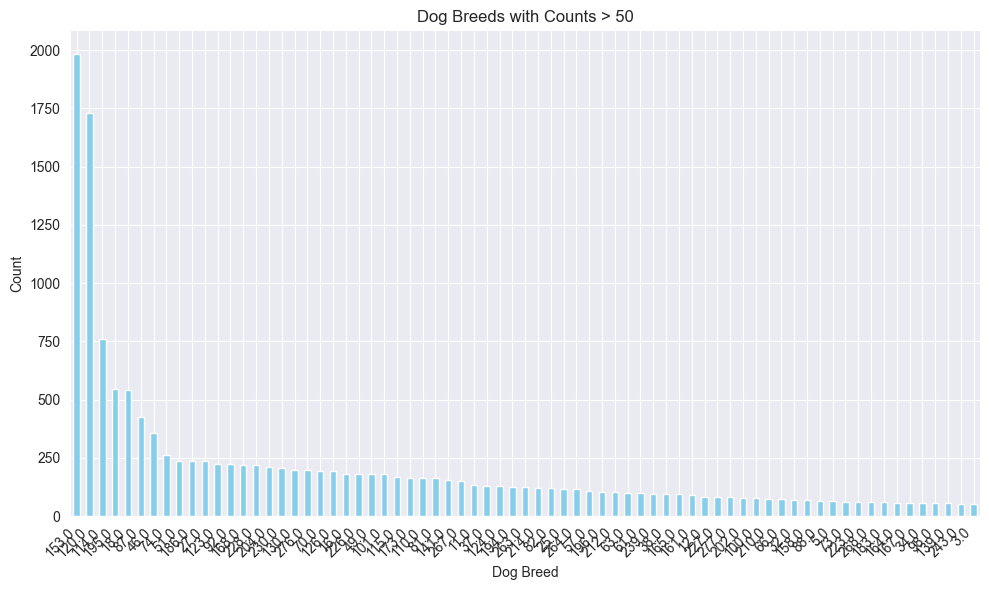

In [45]:
import matplotlib.pyplot as plt

# Assuming 'dd_breed_pure' is the column containing dog breeds
breed_pure_counts = df['dd_breed_pure'].value_counts()

# Filter breeds with counts greater than 50
popular_breeds = breed_pure_counts[breed_pure_counts > 50]

# Plot the data
plt.figure(figsize=(10, 6))
popular_breeds.plot(kind='bar', color='skyblue')
plt.title('Dog Breeds with Counts > 50')
plt.xlabel('Dog Breed')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


In [21]:
df_1 = df[df["dog_id"] == 190]
df_1

,dog_id,owner_id,st_hles_completion_date,dd_breed_pure_or_mixed,dd_breed_pure,dd_breed_pure_non_akc,dd_breed_mixed_primary,dd_breed_mixed_secondary,dd_age_years,dd_age_basis,...,oc_primary_residence_state,oc_primary_residence_census_division,oc_primary_residence_ownership,oc_primary_residence_ownership_other_description,oc_primary_residence_time_percentage,oc_secondary_residence,oc_secondary_residence_state,oc_secondary_residence_ownership,oc_secondary_residence_ownership_other_description,oc_secondary_residence_time_percentage
32754,190,28121,2021-01-09,2,NaN,NaN,999.0,999.0,12.25,1,...,MN,4.0,2,NaN,NaN,False,NaN,NaN,NaN,NaN


In [46]:
if "Bearded Collie" in breed_pure_counts:
    print("True")
else:
    print("False")


False


In [10]:
file_path_HLES_hc = '../Dataset/SurveyData/SurveyData_CSV_DAP_2021_HLES_health_conditions_v1.0.csv'
df_HLES_hc = pd.read_csv(file_path_HLES_hc, delimiter=',')
df_HLES_hc

,dog_id,hs_condition_type,hs_condition,hs_condition_other_description,hs_condition_is_congenital,hs_eye_condition_cause,hs_condition_cause_other_description,hs_neurological_condition_vestibular_disease_type,hs_diagnosis_year,hs_diagnosis_month,hs_required_surgery_or_hospitalization,hs_follow_up_ongoing
0,100001,3,304.0,NaN,False,NaN,NaN,NaN,2021.0,1.0,1.0,False
1,100001,3,305.0,NaN,False,NaN,NaN,NaN,2021.0,1.0,1.0,True
2,100001,3,306.0,NaN,False,NaN,NaN,NaN,2021.0,1.0,1.0,True
3,100004,16,1617.0,NaN,False,NaN,NaN,NaN,2018.0,9.0,4.0,False
4,100005,1,102.0,NaN,False,NaN,NaN,NaN,2021.0,2.0,4.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
92995,99999,13,1306.0,NaN,False,NaN,NaN,NaN,2020.0,6.0,4.0,True
92996,99999,16,1627.0,NaN,False,NaN,NaN,NaN,2018.0,6.0,4.0,False
92997,99999,16,1634.0,NaN,False,NaN,NaN,NaN,2015.0,10.0,4.0,True
92998,82743,4,404.0,NaN,False,NaN,NaN,NaN,2013.0,7.0,4.0,False


In [11]:
df_HLES_hc['dog_id'].value_counts()

dog_id
41178    36
36023    28
64803    26
66370    25
5074     24
         ..
84814     1
84808     1
84802     1
45703     1
59310     1
Name: count, Length: 26702, dtype: int64

In [12]:
df_HLES_hc.dtypes

dog_id                                                 int64
hs_condition_type                                      int64
hs_condition                                         float64
hs_condition_other_description                        object
hs_condition_is_congenital                              bool
hs_eye_condition_cause                               float64
hs_condition_cause_other_description                  object
hs_neurological_condition_vestibular_disease_type    float64
hs_diagnosis_year                                    float64
hs_diagnosis_month                                   float64
hs_required_surgery_or_hospitalization               float64
hs_follow_up_ongoing                                  object
dtype: object

In [14]:
float_columns = df_HLES_hc.select_dtypes(include='float64').columns

In [15]:
float_columns

Index(['hs_condition', 'hs_eye_condition_cause',
       'hs_neurological_condition_vestibular_disease_type',
       'hs_diagnosis_year', 'hs_diagnosis_month',
       'hs_required_surgery_or_hospitalization'],
      dtype='object')